<a href="https://colab.research.google.com/github/CodeCraftTejas/Wildfire_Sentinel/blob/main/Wildfire_Sentinel(Tejas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE_1** :CUSTOM CNN MODEL DEVELOPMENT FOR DETECTION OF FIRE IN LABELLED DATASET

In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

In [ ]:
#Importing the necessary modules required
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train= ImageDataGenerator(rescale=1/255)
test= ImageDataGenerator(rescale=1/255)
train_dataset= train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/forest_fire/Training and Validation',target_size=(150,150),batch_size=32,class_mode='binary')
test_dataset= test.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing',target_size=(150,150),batch_size=32,class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [ ]:
#custom CNN model development
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
model= keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting of model using training and validation data
f=model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 296s 5s/step - accuracy: 0.7986 - loss: 0.4563 - val_accuracy: 0.8676 - val_loss: 0.3244
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9481 - loss: 0.1531 - val_accuracy: 0.8971 - val_loss: 0.3241
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9439 - loss: 0.1782 - val_accuracy: 0.8971 - val_loss: 0.3670
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9641 - loss: 0.1233 - val_accuracy: 0.8971 - val_loss: 0.2351
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9565 - loss: 0.1348 - val_accuracy: 0.8382 - val_loss: 0.4703


In [ ]:
pred=model.predict(test_dataset)
pred=np.round(pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step


In [ ]:
pred

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(len(pred))

68


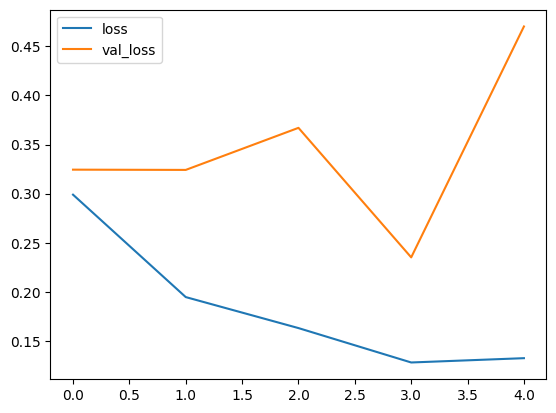

In [ ]:
import matplotlib.pyplot as plt
plt.plot(f.history['loss'],label='loss')
plt.plot(f.history['val_loss'],label='val_loss')
plt.legend()

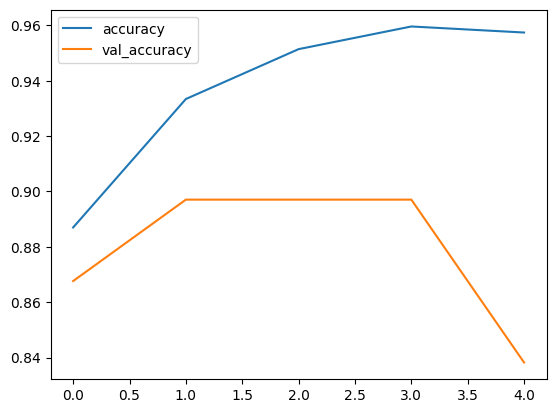

In [ ]:
plt.plot(f.history['accuracy'],label='accuracy')
plt.plot(f.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
# Method definition for detection of fire or non-fire in image
def predictImage(filename):
    img1= image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val= model.predict(X)
    print(val)
    if val==1:
        plt.xlabel('NO FIRE',fontsize=30)
    elif val==0:
        plt.xlabel('FIRE',fontsize=30)

EXAMPLE_1:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[[0.]]


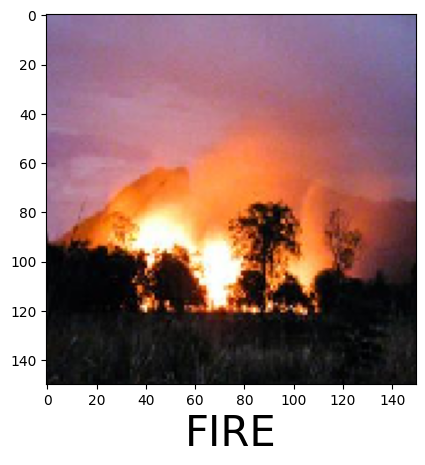

In [ ]:
predictImage('/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/fire/abc183.jpg') #for fire-testing

EXAMPLE_2:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.]]


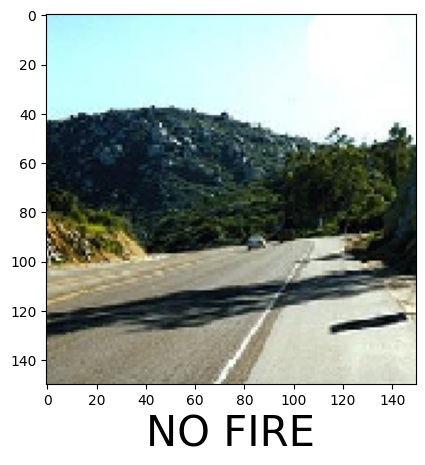

In [ ]:
predictImage('/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/nofire/abc356.jpg') # for non fire-testing

EXAMPLE_3:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.]]


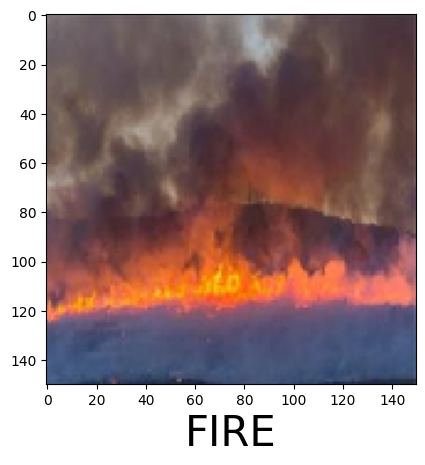

In [ ]:
predictImage('/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/fire/abc178.jpg') # for non fire-testing

**OBJECTIVE_2**: SUMMARIZER AND CAPTIONER DEVELOPMENT TO GENERATE SUMMARY BASED ON DESCRIPTION AND BRIEF/DETAILING ABOUT IMAGE RESPECTIVELY

In [ ]:
!pip install transformers

In [ ]:
!pip install tensorflow pillow transformers torch

In [ ]:
from transformers import pipeline
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
# Load a pre-trained image captioning model
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
# Using a pre-trained LLM for summarization (e.g., GPT-4)
summarizer = pipeline('summarization', model="facebook/bart-large-cnn")

def generate_detailed_description(image_path):
    # Generate caption for the image
    caption = captioner(image_path)
    return caption[0]['generated_text']

def calculate_fire_extent(features):
    fire_extent = np.mean(features)  # Placeholder
    return fire_extent

def extract_features(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150,150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Extract features using the CNN model
    features = model.predict(img_array)
    if isinstance(features,list):
       features=np.array(features[0])
    features = features.flatten()  # Flatten the features to 1D
    return features,img_array

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:

def extract_features(image_path):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(150, 150))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize the image

        # Extract features using the CNN model
        features = model.predict(img_array)

        if isinstance(features, list):
            features = np.array(features[0])

        features = features.flatten()  # Flatten the features to 1D

        if np.all(features == 0):
            print("Warning: All features are zero. Check the model and preprocessing steps.")

        return features, img_array

    except Exception as e:
        print(f"Error extracting features: {e}")
        return None, None

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/fire/abc189.jpg'
features, img_array = extract_features(image_path)
if features is not None:
    fire_extent = calculate_fire_extent(features)
    print(f"Fire extent: {fire_extent * 100*100:.2f}%")
else:
    print("Failed to extract features.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Fire extent: 79.24%


In [ ]:
def generate_detailed_fire_extent(features):
    if 'nofire' in image_path.lower():
        # Description for non-fire images
        description = f"Analysis of image features suggests no significant fire presence. "
        description += f"The observed features are consistent with a non-fire scenario. "
        description += f"There are no prominent fire related intensities or variation detected. "
        description += f" A stable and non-hazardous condition in the captured scene. "
        description += f"Normal Environmental characteristics have been found. "

    elif 'fire' in image_path.lower():
        # Placeholder for more complex fire extent analysis (for fire images)
        fire_extent_mean = np.mean(features)
        fire_extent_max = np.max(features)
        fire_extent_std = np.std(features)
        fire_extent = calculate_fire_extent(features)

        description = f"Analysis of image features indicates a potential fire presence. "
        description += f"The average intensity of fire-related features is {fire_extent_mean:.2f}, "
        description += f"with the most prominent feature reaching an intensity of {fire_extent_max:.2f}. "
        description += f"The variability in these features is {fire_extent_std:.2f}, "
        description += f"suggesting a degree of heterogeneity in the fire's extent."
        description += str(calculate_fire_extent(features))

    return description

In [ ]:
def generate_summary_with_extent(image_path):
    features, img_array = extract_features(image_path)
    caption = captioner(image_path)[0]['generated_text']
    prediction=model.predict(img_array)

    # Calculate fire extent (using the updated function)
    fire_extent_description = generate_detailed_fire_extent(features)

    # Combine caption and fire extent information
    summary_input = f"{caption} {fire_extent_description}"

    # Generate summary
    summary = summarizer(summary_input, max_length=65, min_length=30, do_sample=False)[0]['summary_text']
    return summary

EXAMPLE_1:

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/fire/abc183.jpg'
explain=generate_detailed_description(image_path)
summary = generate_summary_with_extent(image_path)
print(explain)
print(summary)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
a fire burning in the distance of a field
Analysis of image features indicates a potential fire presence. The average intensity of fire-related features is 0.00, with the most prominent feature reaching an intensity of 0.000.


EXAMPLE_2:

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/nofire/abc352.jpg'
explain=generate_detailed_description(image_path)
summary = generate_summary_with_extent(image_path)
print(explain)
print(summary)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
a field with a blue sky and clouds
No significant fire presence. The observed features are consistent with a non-fire scenario. A stable and non-hazardous condition in the captured scene. Normal Environmental characteristics.


EXAMPLE_3:

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/fire/abc178.jpg'
explain=generate_detailed_description(image_path)
summary = generate_summary_with_extent(image_path)
print(explain)
print(summary)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
a fire burns in the hills near the town of santa, california
Analysis of image features indicates a potential fire presence. The average intensity of fire-related features is 0.00, with the most prominent feature reaching an intensity of 0.000.
